* T검정 : 두 집단 간의 차이가 있는지 비교
      - 독립변수 : 범주형
      - 종속변수 : 수치형 
        
  * 단일표본 t-test : 특정 집단의 평균을 어떤 숫자와 비교
  * 독립표본 t-test : 서로 다른 두 그룹 간 평균 비교
  * 대응표본 t-test : 한 집단의 처리(사건) 전후 평균 비교

## 1. 단일 표본 t-test

     - scipy의 ttest_1samp 사용 - stats.ttest_1samp(x, n) : x : 데이터 n : 비교할 평균

     (1) 가설 설정 : 귀무가설(=) / 대립가설(=/)
     
     (2) 검정통계량 설정
     
     (3) 기각역 설정 : 유의수준
     
     (4) p-value 계산
     
     (5) 가설 검정

In [117]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import ttest_1samp   # 해당 패키지 임포트시 ttest_1samp만 입력해도 결과 출력
from scipy.stats import shapiro   # 정규성 검증을 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# 사용할 데이터인 감자칩의 중량 데이터 생성
# 감자칩의 중량이 평균 90에 일치하는가를 판별

df1=np.array([89.03,95.07,88.26,90.07,90.6,87,87.67,88.8,90.46,81.33])
print(df1)

[89.03 95.07 88.26 90.07 90.6  87.   87.67 88.8  90.46 81.33]


자료가 정규성을 충족하는지 판단

In [101]:
shapiro(df1)

# p-value가 0.28로 유의수준 0.05보다 크기 때문에 정규성 만족
#   - 귀무가설이 채택되기 때문에(=)

ShapiroResult(statistic=0.9104638695716858, pvalue=0.28419265151023865)

감자칩 자료의 단일표본 t-test 시행

In [102]:
df1_ttest_1samp=stats.ttest_1samp(potato_chip, 90)
# scipy의 ttest_1samp 사용 - stats.ttest_1samp(x, n) : x : 데이터 n : 비교할 평균

df1_ttest_1samp
# t-value(검정통계량) : 1.07 p-value : 0.3120
# 따라서 귀무가설 채택. 즉, 감자칩의 중량은 평균 90에 해당한다.

Ttest_1sampResult(statistic=-1.071079943556364, pvalue=0.31201445250451004)

표본 데이터를 seaborn의 distplot을 사용하여 히스토그램으로 시각화

Text(0.5, 0, 'the weight for the snack')

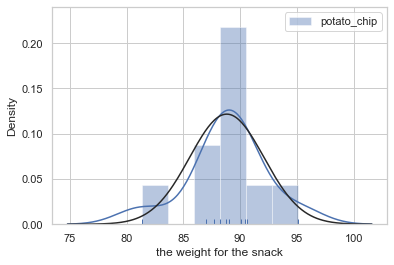

In [103]:
ax=sns.distplot(df1,kde=True,fit=stats.norm,label='potato_chip',color='b', rug=True)
plt.legend()
plt.xlabel('the weight for the snack')

# 데이터 대부분이 90g에 근접함을 알 수 있다.

## 2. 독립 표본 t-test
    - 독립변수 : 범주형(2개 집단), 종속변수 : 연속형
    - 두 집단은 서로 독립임을 가정
    - 이때 두 집단의 등분산성에 대한 검정을 사전에 수행함.(유의수준보다 커야 함)
    
    (1) 등분산 가정
       - stats.levene(df1,df2)
       - stats.fligner(df1,df2)
       - stats.bartlett(df1,df2)
     
     (2) 독립표본 t-test
       - stats.ttest_ind(df1,df2,equal_var=True) -> equal_var=True 는 등분산에 차이가 없음을 의미 

In [111]:
# a유통은 새로운 프로모션을 기획했다. 이때 프로모션 진행이 과연 적절한지에 대한 검증이 필요하다
# 독립변수는 프로모션 유무이며 종속변수는 수익이다.

df2=pd.read_csv('C:/Users/dudsk/datafile/promotion.csv')
df2.head(4)

,Store,promotion,profit
0,1,NO,2100
1,2,YES,3000
2,3,YES,2200
3,4,YES,2600


In [112]:
# promotion을 받지 않은 집단의 기초통계량

df2[df2.promotion=='NO'][['profit']].describe()

,profit
count,52.000000
mean,1923.076923
std,347.887397
min,1400.000000
25%,1675.000000
50%,1900.000000
75%,2125.000000
max,2800.000000


In [113]:
# promotion을 받은 집단의 기초통계량

df2[df2.promotion=='YES'][['profit']].describe()

,profit
count,48.000000
mean,2906.250000
std,331.602332
min,2200.000000
25%,2600.000000
50%,2900.000000
75%,3125.000000
max,3600.000000


독립표본 t-test를 시행함과 동시에 레빈, 플리그너, 바틀렛 등분산 검정을 시행한다

In [134]:
# 프로모션 실행과 미실행의 두 집단으로 구분된 데이터를 활용
df2_yes=df2[df2.promotion=='YES']['profit'] 
df2_no=df2[df2.promotion=='NO']['profit']     # 검정은 1차원 출력이므로 [] 하나로만 감싼다.

# 등분산 검정 레빈
levene=stats.levene(df2_yes,df2_no)
print(levene)

# 등분산 플리그너
fligner=stats.fligner(df2_yes,df2_no)
print(fligner)

# 등분산 바틀렛
bartlett=stats.bartlett(df2_yes,df2_no)
print(bartlett)

# 독립표본 t-test
df2_ttest_ind=stats.ttest_ind(df_yes,df_no,equal_var=True)
print(df2_ttest_ind)

# 등분산 검정 결과 p-value가 유의수준 0.05보다 크므로 등분산성 조건을 만족한다
# t-test 검정 결과 t값(검정통계량)은 14.439이며, p-value는 유의수준 0.05보다 작으므로 로 두 집단에는 차이가 있다(귀무가설 기각)

LeveneResult(statistic=0.2584791718538349, pvalue=0.6123094972971628)
FlignerResult(statistic=0.17882366723950327, pvalue=0.6723861172631853)
BartlettResult(statistic=0.11111189033299336, pvalue=0.7388817981694387)
Ttest_indResult(statistic=14.439444741743737, pvalue=5.272506488147903e-26)


## 3. 대응 표본 t-test
     - stats.ttest_rel(df1,df2)

In [118]:
# s전자는 새로운 광고모델 a를 채용했다. 그러나 광고비 과다 지출로 a를 지속해서 채용하는 것이
# 매출 증대에 실질적으로 도움이 되는지 확인해 볼 필요성을 느껴 검정하기로 한다.

df3=pd.read_csv('C:/Users/dudsk/datafile/tvads.csv')
df3.head(4)

,store,before,after
0,1,290,326
1,2,304,306
2,3,282,328
3,4,293,322


In [136]:
# 먼저 광고모델 a를 사용하기 전과 후의 두 집단으로 구분한다.
df3_before=df3.before
df3_after=df3.after

# 대응표본 t-test
df3_ttest_rel=stats.ttest_rel(df3_before,df3_after)
df3_ttest_rel

# t-test 결과 t-value(검정통계량)dms 13.53이며 p-value는 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다
# 즉, 광고모델 a를 사용하기 전과 후의 차이가 존재한다.

Ttest_relResult(statistic=-13.532101813984697, pvalue=5.472565823443566e-19)

In [138]:
diff_df3_result=df3_after-df3_before
diff_df3_result.mean()

# 두 집단은 광고 집행 전후로 평균 33.29의 매출 증가가 있었다.

33.29090909090909

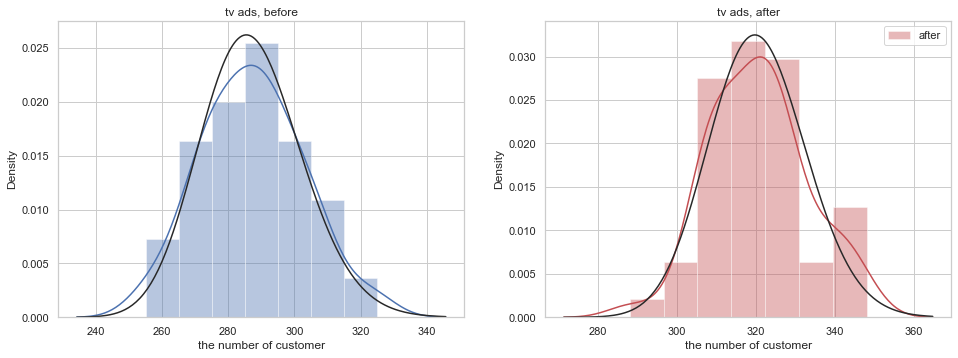

In [149]:
# 광고 전후 집단의 플롯 생성

plt.figure(figsize=(16,12))    # 다중 플롯 생성

ax1=plt.subplot(221)
ax1=sns.distplot(df3_before,kde=True,fit=stats.gamma,label='before',color='b')
ax1.set(xlabel='the number of customer', title='tv ads, before')

ax2=plt.subplot(222)
ax2=sns.distplot(df3_after, kde=True, fit=stats.gamma, label='after',color='r')
ax2.set(xlabel='the number of customer', title='tv ads, after')

plt.legend()

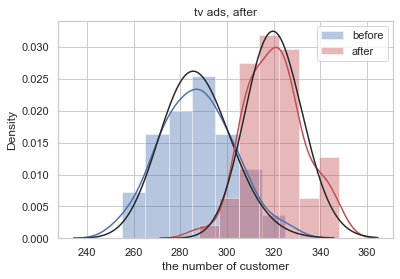

In [151]:
# 두 플롯을 겹쳐서 생성해 보자

ax3=sns.distplot(df3_before,kde=True,fit=stats.gamma,label='before',color='b')
ax3=sns.distplot(df3_after, kde=True, fit=stats.gamma, label='after',color='r')
ax3.set(xlabel='the number of customer', title='tv ads, after')
plt.legend()